# Adaline example: iris dataset classification

Network: Adaline (Adaptive Linear Neuron) \
Decision rule: step function \
Error update rule: Gradient descent \
Loss function: Sum of Squared Error (SSE) \
Hyper-plane: step function(transpose(W) * target) = 0 \
Actication function: linear function

Step 1. Load dataset

In [1]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Step 2. Data pre-processing

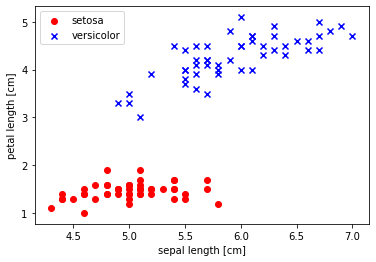

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Y = df.iloc[0:100, 4]
Y = np.where(Y == 'Iris-setosa',-1,1)
X = df.iloc[0:100,[0,2]].values

X_std = np.copy(X)
X_std[:,0] = (X_std[:,0] - X_std[:,0].mean()) / X_std[:,0].std()
X_std[:,1] = (X_std[:,1] - X_std[:,1].mean()) / X_std[:,1].std()

plt.scatter(X[:50,0],X[:50,1],color='red',marker='o',label='setosa')
plt.scatter(X[50:100,0],X[50:100,1],color='blue',marker='x',label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

Step 3-1. Training

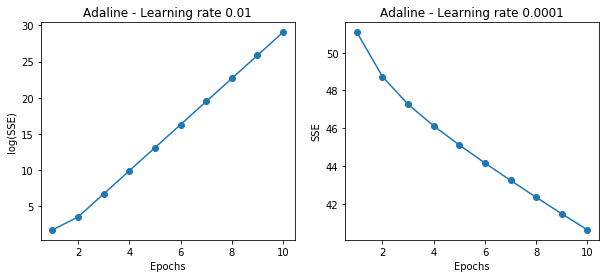

In [3]:
import func

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4))

ada1 = func.AdalineGD(n_iter = 10, eta = 0.01).fit(X,Y)
ax[0].plot(range(1,len(ada1.cost_) + 1),np.log10(ada1.cost_),marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(SSE)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = func.AdalineGD(n_iter = 10, eta = 0.0001).fit(X,Y)
ax[1].plot(range(1,len(ada2.cost_) + 1),ada2.cost_,marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('SSE')
ax[1].set_title('Adaline - Learning rate 0.0001')

ada = func.AdalineGD(n_iter = 10, eta = 0.01).fit(X_std,Y) #Input: Data scaling

plt.show()

Step 3. Inference (=Prediction)

In [4]:
x1_min, x1_max = X_std[:,0].min() - 1, X_std[:,0].max() + 1
x2_min, x2_max = X_std[:,1].min() - 1, X_std[:,1].max() + 1
xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,0.02),np.arange(x2_min,x2_max,0.02))

Z = ada.prediction(np.array([xx1.ravel(),xx2.ravel()]).T)

In [5]:
for i in range(10):
    print(str(X_std[i]) + " -> " + str(Z[i]) + " , Ground truth = " + str(Y[i]))

[-0.5810659  -1.01435952] -> -1 , Ground truth = -1
[-0.89430898 -1.01435952] -> -1 , Ground truth = -1
[-1.20755205 -1.08374115] -> -1 , Ground truth = -1
[-1.36417359 -0.94497788] -> -1 , Ground truth = -1
[-0.73768744 -1.01435952] -> -1 , Ground truth = -1
[-0.11120129 -0.80621461] -> -1 , Ground truth = -1
[-1.36417359 -1.01435952] -> -1 , Ground truth = -1
[-0.73768744 -0.94497788] -> -1 , Ground truth = -1
[-1.67741667 -1.01435952] -> -1 , Ground truth = -1
[-0.89430898 -0.94497788] -> -1 , Ground truth = -1


Step 4. Visualization (For Performance analysis)

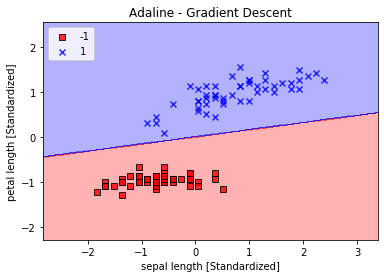

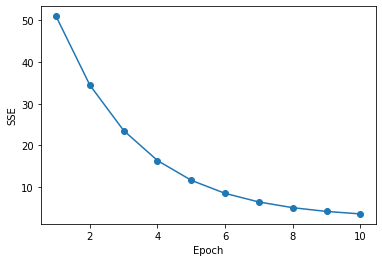

In [6]:
from Visualization import plot_decision_regions
plot_decision_regions(X_std,Y,Z)

plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [Standardized]')
plt.ylabel('petal length [Standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1,len(ada.cost_) + 1), ada.cost_,marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.show()

Appendix. Adaline (apply Stochastic gradient descent)

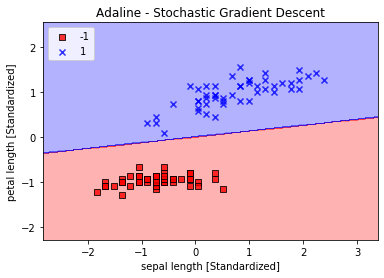

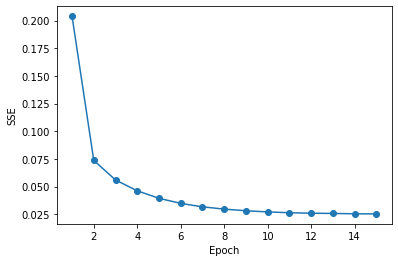

In [8]:
ada_SGD = func.AdalineSGD(n_iter = 15, eta = 0.01,random_state = 1).fit(X_std,Y)
Z_SGD = ada_SGD.prediction(np.array([xx1.ravel(),xx2.ravel()]).T)
plot_decision_regions(X_std,Y,Z_SGD)

plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [Standardized]')
plt.ylabel('petal length [Standardized]')
plt.legend(loc = 'upper left')
plt.show()

plt.plot(range(1,len(ada_SGD.cost_) + 1), ada_SGD.cost_,marker = 'o')
plt.xlabel('Epoch')
plt.ylabel('SSE')
plt.show()